<a href="https://colab.research.google.com/github/DaveChui/Decision-Trees-ML/blob/main/Decision_Trees_and_SVM_Dave_Njoroge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees and Support Vector Machine
### 1. Defining the Question
####a.) Specifying the Question
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### b.) Determining the metric for success
While solving the specified problem, we should be able to create a model(s) which will be able to inform us of the hypothyroidism status of a specific patient which should have a realtively high accuracy considering that it involves peoples' livelihoods.

#### c.) Understanding the context
Using the medical field dataset provided, we're supposed to predict with the highest accuracy level whether a person has hypothyroidism or not which will be a matter of high imprortance.
This is a Hypothyroidism's deficiency of thyroid hormones which can disrupt things like heart rate, body temperature and all aspects of metabolism.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain. Treatment consists of thyroid hormone replacement.

#### d.) Recording the experimental design
###### i.)Reading Data
###### ii.)Checking the Data
##### iii.)Cleaning the Data
##### iv.)Exploratory Analysis
##### v.)Implementing the solution
##### vi.)Challenging the solution
##### vii.)Follow up questions

#### e.) Data Relevance
The various data fields can be better understood and validated from the following link. http://archive.ics.uci.edu/ml/datasets/Thyroid+Disease

Age
Age of the patient (0.01–0.97). Continuous variable.

Sex
Sex of the patient, 0 (Male) 1 (Female). Binary variable.

On_thyroxine
0 (FALSE) 1 (TRUE). Binary variable.

Query_on_thyroxine
0 (FALSE) 1 (TRUE). Binary variable.

On_antithyroid_medication
0 (FALSE) 1 (TRUE). Binary variable.

Sick
0 (FALSE) 1 (TRUE). Binary variable.

Pregnant
0 (FALSE) 1 (TRUE). Binary variable.

Thyroid_surgery
0 (FALSE) 1 (TRUE). Binary variable.

I131_treatment
0 (FALSE) 1 (TRUE). Binary variable.

Query_hypothyroid
0 (FALSE) 1 (TRUE). Binary variable.

Query_hyperthyroid
0 (FALSE) 1 (TRUE). Binary variable.

Lithium
0 (FALSE) 1 (TRUE). Binary variable.

Goitre
0 (FALSE) 1 (TRUE). Binary variable.

Tumor
0 (FALSE) 1 (TRUE). Binary variable.

Hypopituitary
0 (FALSE) 1 (TRUE). Binary variable.

Psych
0 (FALSE) 1 (TRUE). Binary variable.

TSH
amount of TSH (0.0–0.53). Continuous variable.

T3
amount of T3 (0.0005–0.18). Continuous variable.

TT4
amount of TT4 (0.002–0.6). Continuous variable.

T4U
amount of T4U (0.017–0.233). Continuous variable.

FTI
amount of FTI (0.002–0.642). Continuous variable.

Class
1 (normal) 2 (hyperthyroidism) 3 (hypothyroidism). Class variable.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### 1.) Reading the data

In [ ]:
#reading the data and getting the shape
hypothyroid = pd.read_csv('/content/hypothyroid.csv')
hypothyroid.shape

(3163, 26)

In [ ]:
#preview the top of our data
hypothyroid.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?


In [ ]:
#preview the bottom of our data
hypothyroid.tail(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#getting some numerical statistics about data
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [ ]:
#checking the dataset's data types

hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
#Checking the dataset columns
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

### 2.) Data Cleaning

In [ ]:
# First we begin by checking for unknown data

hypothyroid['age'].value_counts()

?     446
59     64
60     64
62     63
28     60
     ... 
5       1
8       1
7       1
4       1
93      1
Name: age, Length: 93, dtype: int64

In [ ]:
# we will now drop the unknown entries
hypothyroid.drop(hypothyroid.index[hypothyroid['age'] == '?'], inplace = True)

In [ ]:
# Converting the age feature to integer data type
hypothyroid['age'] = hypothyroid['age'].astype(int)

In [ ]:
# We check for unknowns in the gender feature
hypothyroid['sex'].value_counts()

F    1909
M     791
?      17
Name: sex, dtype: int64

In [ ]:
# we will now drop the unknown entries
hypothyroid.drop(hypothyroid.index[hypothyroid['sex'] == '?'], inplace = True)

In [ ]:
hypothyroid['status'].value_counts()

negative       2564
hypothyroid     136
Name: status, dtype: int64

In [ ]:
hypothyroid['TBG'].value_counts()
#since we have very many unknown values, we will drop this feature to avoid any type of bias

?       2475
28        13
21        13
23        13
30        12
20        11
25        11
31        11
19         9
33         9
29         8
26         8
32         7
27         7
17         7
36         6
38         6
18         6
34         5
35         5
16         5
39         5
108        4
37         4
40         3
24         3
110        3
22         3
43         2
65         2
14         2
15         2
41         2
80         1
8.40       1
69         1
0          1
7.30       1
48         1
12         1
11         1
52         1
3.10       1
47         1
50         1
86         1
45         1
63         1
13         1
9.30       1
122        1
Name: TBG, dtype: int64

In [ ]:
# we now drop the TBG columns

#drop the tbg column
hypothyroid.drop(['TBG','TBG_measured'],axis=1,inplace=True)

In [ ]:
# in case we have other unknowns in the remaining fileds, we shall drop them

hypothyroid.drop(hypothyroid.index[hypothyroid['TT4'] == '?'],inplace=True)
hypothyroid.drop(hypothyroid.index[hypothyroid['T3'] == '?'],inplace=True)
hypothyroid.drop(hypothyroid.index[hypothyroid['T4U'] == '?'],inplace=True)
hypothyroid.drop(hypothyroid.index[hypothyroid['TSH'] == '?'],inplace=True)

In [ ]:
hypothyroid.shape


(2000, 24)

In [ ]:
#we shall rename the status value from hypothyroid to positive
hypothyroid.status = hypothyroid.status.replace({'hypothyroid': 'Positive'})

In [ ]:
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,Positive,72,M,f,f,f,f,f,f,f,...,y,30,y,0.60,y,15,y,1.48,y,10
1,Positive,15,F,t,f,f,f,f,f,f,...,y,145,y,1.70,y,19,y,1.13,y,17
2,Positive,24,M,f,f,f,f,f,f,f,...,y,0,y,0.20,y,4,y,1,y,0
3,Positive,24,F,f,f,f,f,f,f,f,...,y,430,y,0.40,y,6,y,1.04,y,6
4,Positive,77,M,f,f,f,f,f,f,f,...,y,7.30,y,1.20,y,57,y,1.28,y,44


In [ ]:
#Check the data types to know what to convert
hypothyroid.dtypes

status                       object
age                           int64
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
dtype: object

In [ ]:
# Convert some object data type to float

hypothyroid['FTI'] = hypothyroid['FTI'].astype(float)
hypothyroid['T4U'] = hypothyroid['T4U'].astype(float)
hypothyroid['T3'] = hypothyroid['T3'].astype(float)
hypothyroid['TT4'] = hypothyroid['TT4'].astype(float)
hypothyroid['TSH'] = hypothyroid['TSH'].astype(float)

In [ ]:
#reCheck the data types to see effected changes
hypothyroid.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
dtype: object

### 3.) Exploratory Data Analysis

In [ ]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

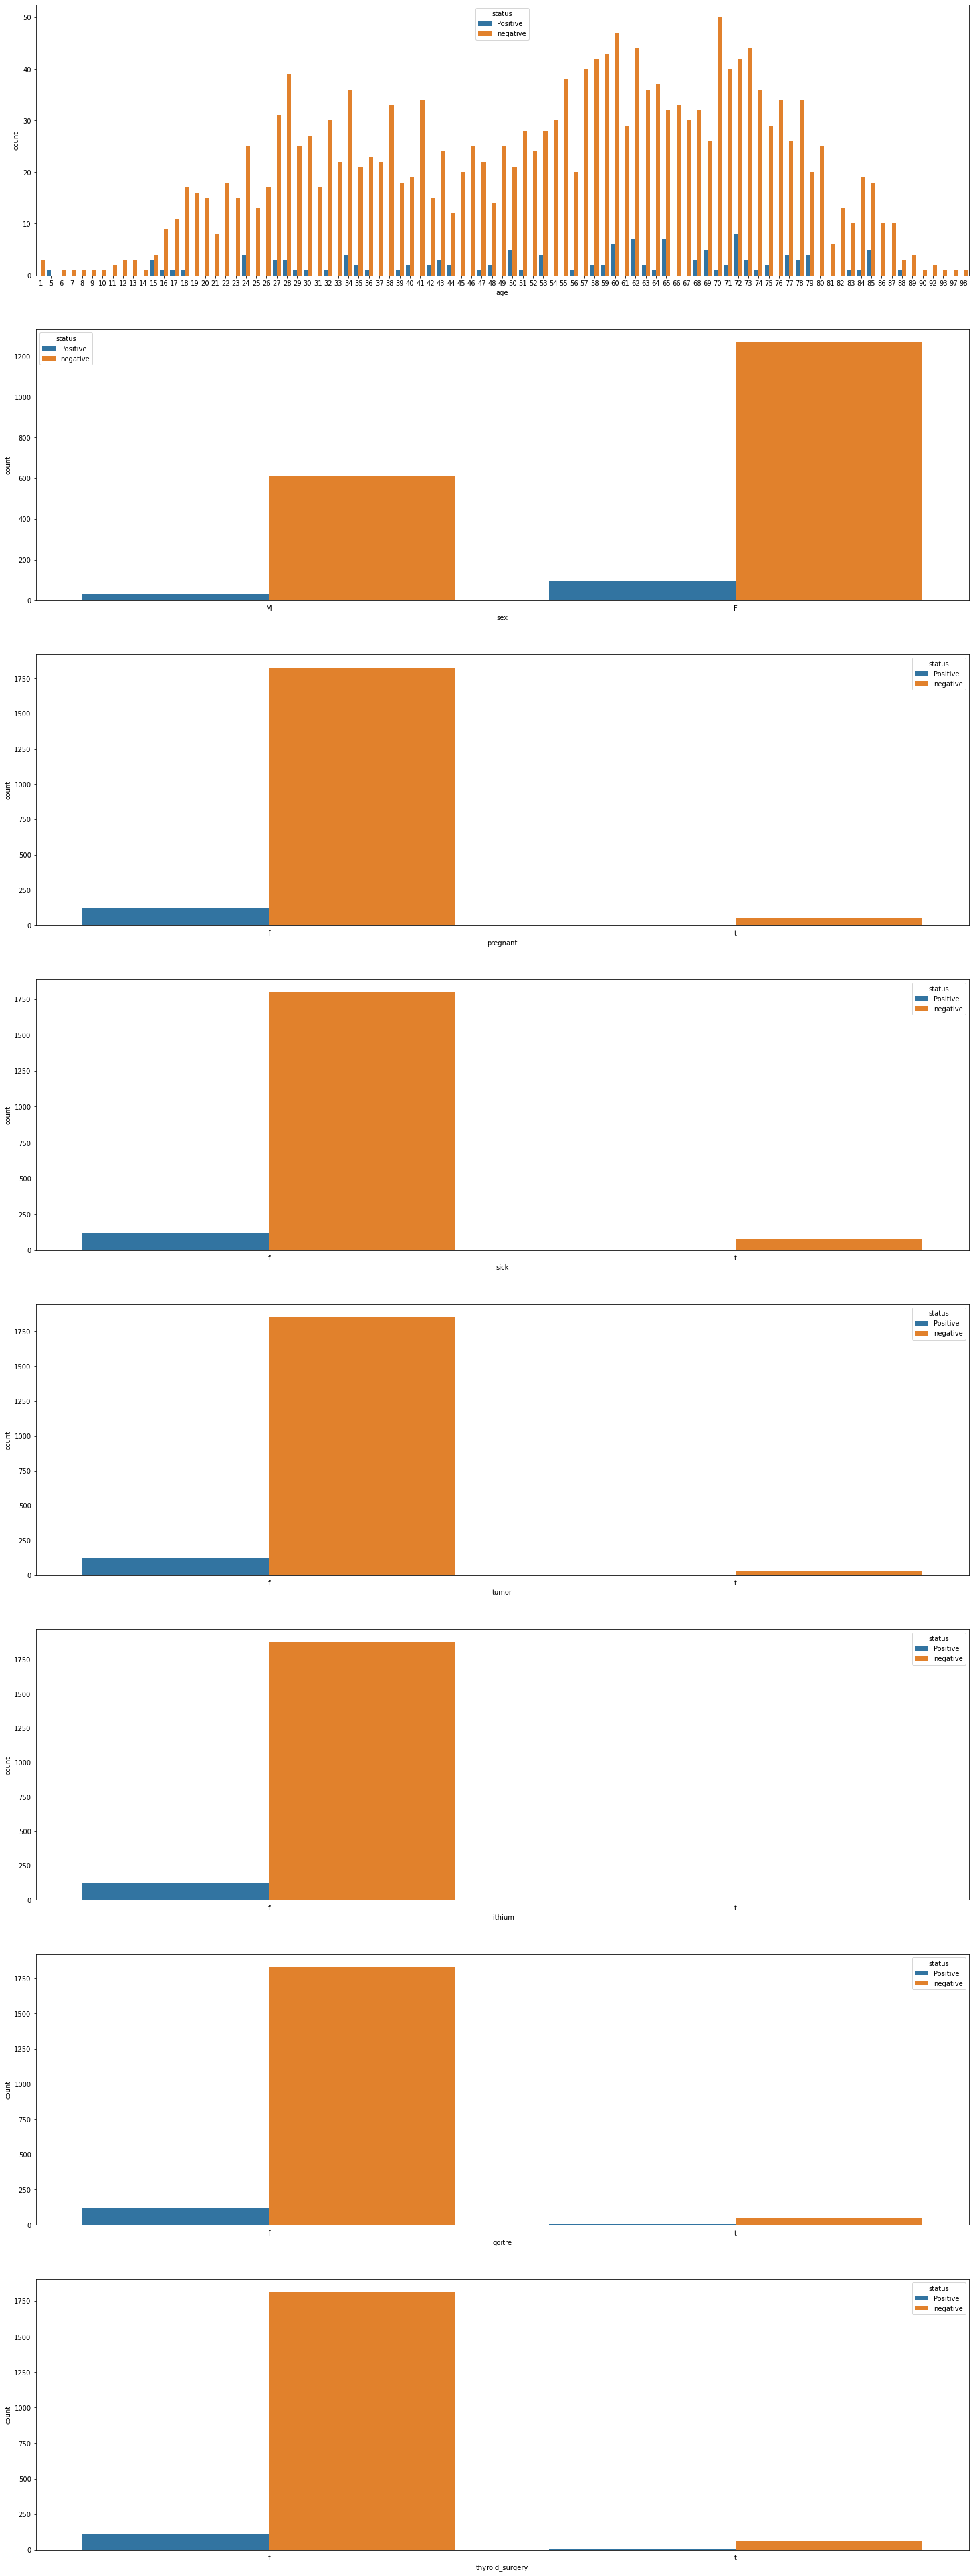

In [ ]:
# Plotting some univariate summaries and recording our observations
#
import seaborn as sns
f, axes = plt.subplots(8, 1, figsize=[25, 70])

sns.countplot('age', hue= 'status', data=hypothyroid, ax=axes[0])
sns.countplot('sex', hue= 'status', data=hypothyroid, ax=axes[1])
sns.countplot('pregnant', hue= 'status', data=hypothyroid, ax=axes[2])
sns.countplot('sick', hue= 'status', data=hypothyroid, ax=axes[3])
sns.countplot('tumor', hue= 'status', data=hypothyroid, ax=axes[4])
sns.countplot('lithium', hue= 'status', data=hypothyroid, ax=axes[5])
sns.countplot('goitre', hue= 'status', data=hypothyroid, ax=axes[6])
sns.countplot('thyroid_surgery', hue= 'status', data=hypothyroid, ax=axes[7])

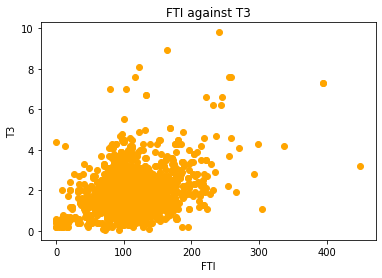

0.33548252194184724


In [ ]:
## Bivariate analysis

#The relationship between T3 and FTI if any
plt.scatter(hypothyroid['FTI'],hypothyroid['T3'],color = 'orange')
plt.title('FTI against T3')
plt.xlabel('FTI')
plt.ylabel('T3')
plt.show()

coef = hypothyroid['FTI'].corr(hypothyroid['T3'])
print(coef)

#relatively weak relationship between T3 and FTI

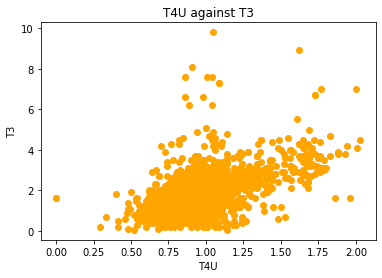

0.49967572116055475


In [ ]:
#The relationship between T3 and FTI
plt.scatter(hypothyroid['T4U'],hypothyroid['T3'],color = 'orange')
plt.title('T4U against T3')
plt.xlabel('T4U')
plt.ylabel('T3')
plt.show()

coef = hypothyroid['T4U'].corr(hypothyroid['T3'])
print(coef)

#There is some significant correlation between T3 and FTI

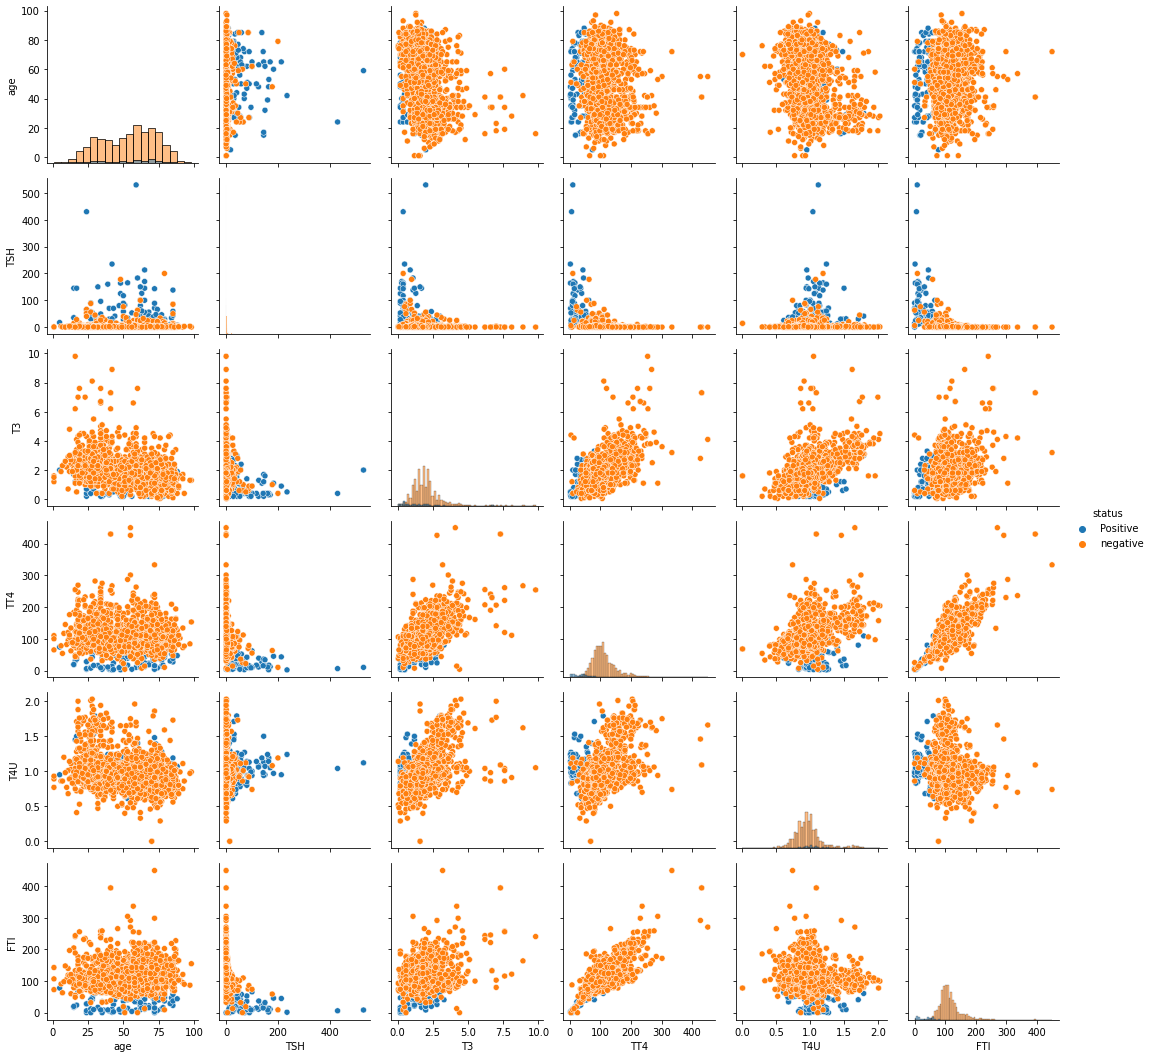

In [ ]:
#we can populate a pair plot to visualize more.
g = sns.PairGrid(hypothyroid, hue="status")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


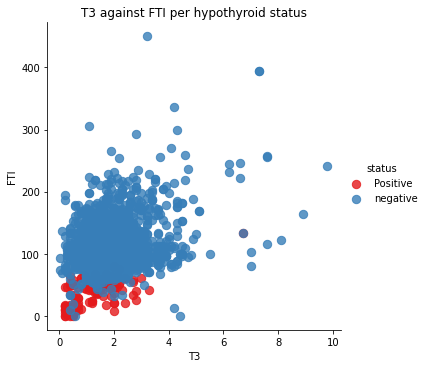

In [ ]:
# Mulivariate analysis

import seaborn as sns
sns.lmplot('T3','FTI',data = hypothyroid,palette='Set1',hue='status',fit_reg=False, scatter_kws={"s": 70})
plt.title('T3 against FTI per hypothyroid status')

plt.show()

#Only a few number of positive cases of Hypothyroid have low levels of FTI and T3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


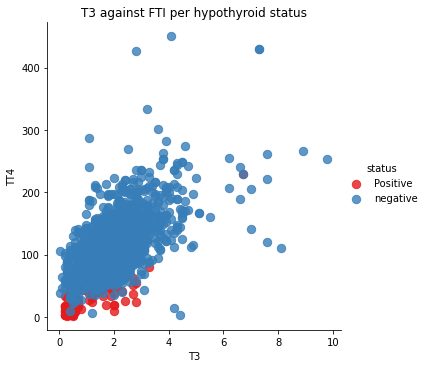

In [ ]:
#Multivariate analysis

sns.lmplot('T3','TT4',data = hypothyroid,palette='Set1',hue='status',fit_reg=False, scatter_kws={"s": 70})
plt.title('T3 against FTI per hypothyroid status')

plt.show()

#we can see that T3 and T4 values are quite low for persons with hypothyroid

Encoding and Multicollinearity

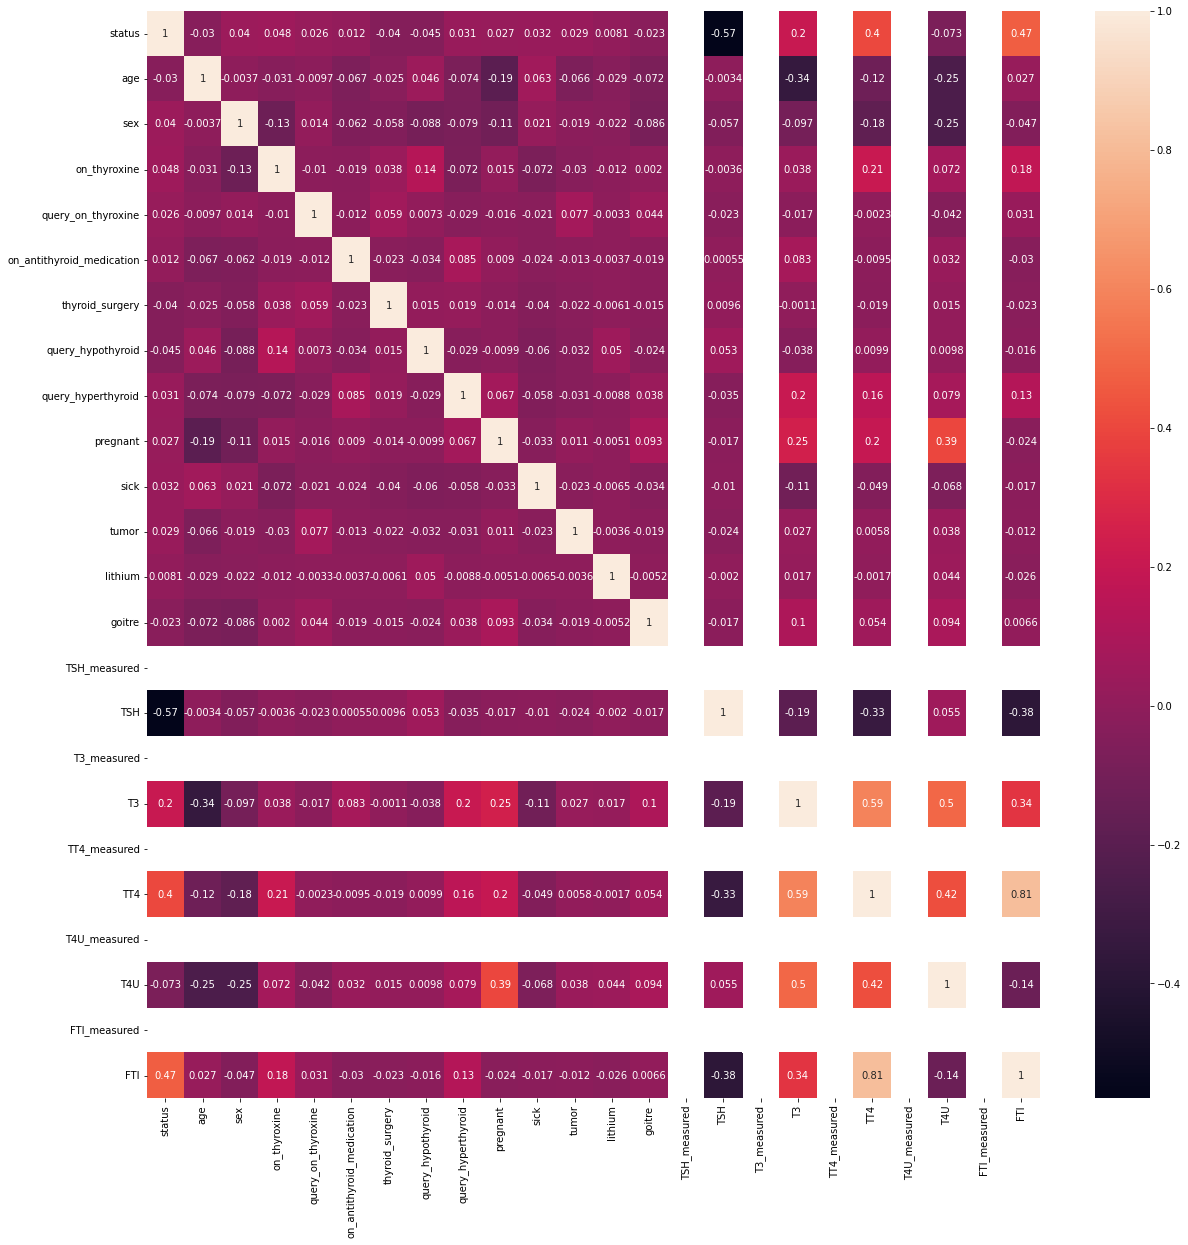

In [ ]:
# correlation heat map
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(hypothyroid.corr(),annot=True)
plt.show()

In [ ]:
# Here, since most of our data is categorical, we will encode it to numerical values.


enc = hypothyroid.dtypes == object
myenc = hypothyroid.columns[enc].tolist()

from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()

hypothyroid[myenc] = hypothyroid[myenc].apply(lambda col:lenc.fit_transform(col))


In [ ]:
#preview the data to see the changes
hypothyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72,1,0,0,0,0,0,0,0,...,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,0,15,0,1,0,0,0,0,0,0,...,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0


In [ ]:
#Next step is to check for mutlicollinearity
data = hypothyroid.drop(columns=['status'])

# Let's display the correlations between the variables
correlations = data.corr()

correlations

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
age,1.000000,-0.003711,-0.030972,-0.009678,-0.067312,-0.024871,0.045694,-0.074038,-0.193525,0.062583,...,NaN,-0.003414,NaN,-0.344661,NaN,-0.123445,NaN,-0.249693,NaN,0.026850
sex,-0.003711,1.000000,-0.130928,0.013576,-0.061573,-0.057584,-0.088285,-0.078853,-0.109721,0.020555,...,NaN,-0.056956,NaN,-0.097376,NaN,-0.177993,NaN,-0.249017,NaN,-0.047062
on_thyroxine,-0.030972,-0.130928,1.000000,-0.010102,-0.018882,0.038433,0.137478,-0.071979,0.015337,-0.071671,...,NaN,-0.003601,NaN,0.037829,NaN,0.210875,NaN,0.072485,NaN,0.177283
query_on_thyroxine,-0.009678,0.013576,-0.010102,1.000000,-0.012051,0.059088,0.007262,-0.028693,-0.016495,-0.021299,...,NaN,-0.022898,NaN,-0.017305,NaN,-0.002250,NaN,-0.041932,NaN,0.030740
on_antithyroid_medication,-0.067312,-0.061573,-0.018882,-0.012051,1.000000,-0.022606,-0.033669,0.084746,0.009019,-0.024188,...,NaN,0.000551,NaN,0.082733,NaN,-0.009509,NaN,0.032434,NaN,-0.029542
thyroid_surgery,-0.024871,-0.057584,0.038433,0.059088,-0.022606,1.000000,0.015066,0.018856,-0.013753,-0.039957,...,NaN,0.009550,NaN,-0.001087,NaN,-0.019027,NaN,0.014970,NaN,-0.022632
query_hypothyroid,0.045694,-0.088285,0.137478,0.007262,-0.033669,0.015066,1.000000,-0.029226,-0.009940,-0.059511,...,NaN,0.053470,NaN,-0.038018,NaN,0.009908,NaN,0.009832,NaN,-0.015522
query_hyperthyroid,-0.074038,-0.078853,-0.071979,-0.028693,0.084746,0.018856,-0.029226,1.000000,0.066904,-0.057594,...,NaN,-0.035411,NaN,0.200183,NaN,0.157951,NaN,0.079484,NaN,0.129400
pregnant,-0.193525,-0.109721,0.015337,-0.016495,0.009019,-0.013753,-0.009940,0.066904,1.000000,-0.033109,...,NaN,-0.016759,NaN,0.245750,NaN,0.195042,NaN,0.394950,NaN,-0.023529
sick,0.062583,0.020555,-0.071671,-0.021299,-0.024188,-0.039957,-0.059511,-0.057594,-0.033109,1.000000,...,NaN,-0.009997,NaN,-0.109648,NaN,-0.049137,NaN,-0.067527,NaN,-0.016917


### 4.) Implementing the solution

####Random Forest


In [ ]:
#building a Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

feat = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4','T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = hypothyroid[feat].values

y = hypothyroid['status'].values

In [ ]:
#split,train and test random forest model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

forest = RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini',max_depth=5,min_samples_split=10)

forest = forest.fit(X_train,y_train)

mypred = forest.predict(X_test)

In [61]:
# Importing our model
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 500, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame

,Actual,Predicted
0,1,0.999896
1,1,0.999896
2,1,0.999896
3,1,0.999896
4,1,0.999896
...,...,...
395,1,0.999896
396,1,0.999896
397,1,0.999517
398,1,0.999896


In [ ]:
#check accuracy of Random Forest model

from sklearn.metrics import accuracy_score

myaccu = accuracy_score(y_test,mypred)

myaccu * 100


98.0

From the above, our accuracy is at 98%. It's quite high thus incresing the likelihood of overfitting our model.

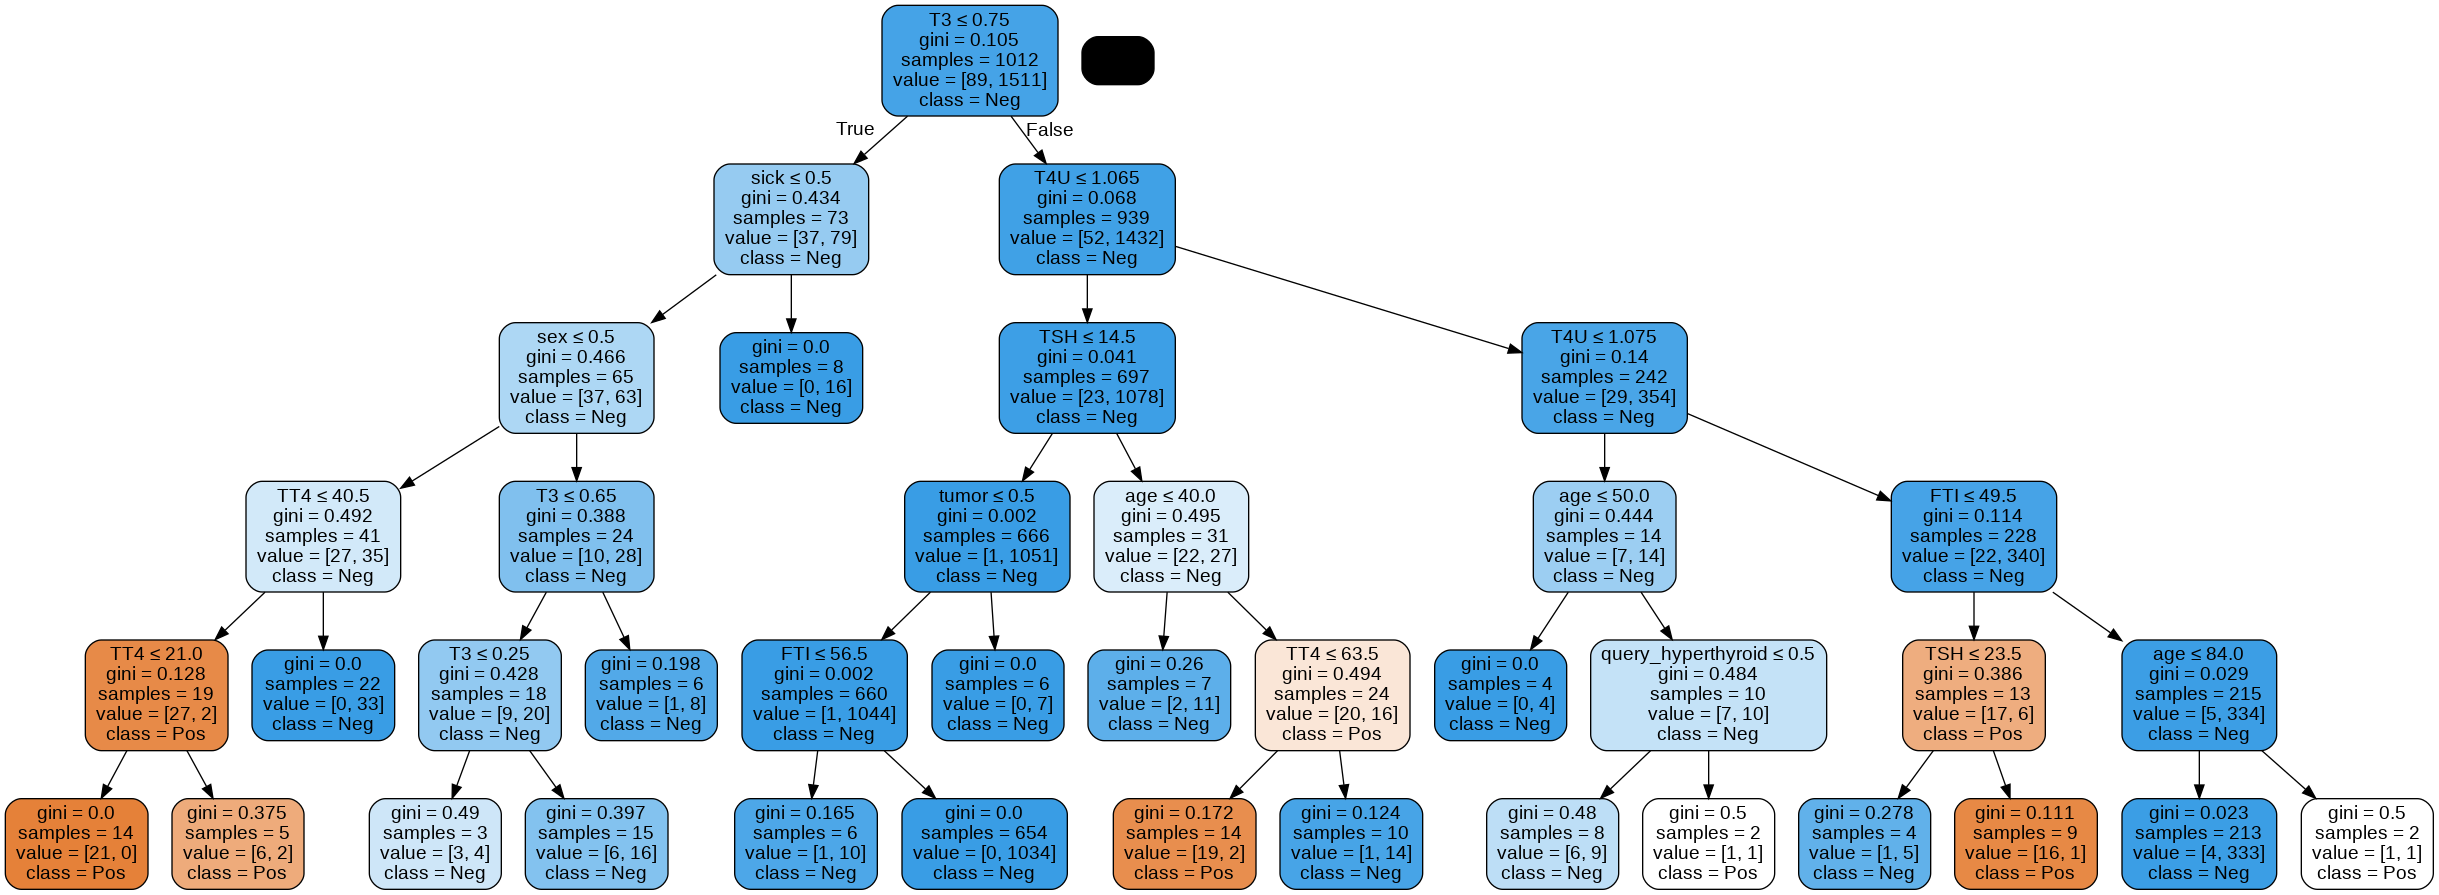

In [ ]:
#We visualize our decision tree

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[30]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names = ['Pos','Neg'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hyperthyroid.png')
Image(graph.create_png())

In [ ]:
# finding the most significant features in data
importances = list(tree.feature_importances_)

features = [(feature, round(importance, 5)) for feature, importance in zip(feat, importances)]

features = sorted(features, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in features];

Variable: TT4                  Importance: 0.33196
Variable: TSH                  Importance: 0.20127
Variable: FTI                  Importance: 0.19015
Variable: T3                   Importance: 0.15147
Variable: age                  Importance: 0.0428
Variable: T4U                  Importance: 0.03887
Variable: sick                 Importance: 0.03152
Variable: sex                  Importance: 0.01168
Variable: query_hyperthyroid   Importance: 0.00029
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measur

From the above outcome, we find that the variables TT4, TSH, FTI, and T3 are the most significant features. Others like age, sick, and query_hyperthyroid are less significant but we shall also use them in our model.

In [ ]:
#random forest model using only the significant variables
feat = ['age', 'sex','sick','TSH','T3', 'TT4', 'T4U', 'FTI']

In [ ]:
X = hypothyroid[feat].values

y = hypothyroid['status'].values

#split,train and test random forest model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

forest = RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini',max_depth=5,min_samples_split=10)

forest = forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

#check accuracy of Random Forest model

from sklearn.metrics import accuracy_score

myaccu = accuracy_score(y_test,y_pred)

myaccu * 100



98.75

We can observe that our model improves its accuracy by 0.75% after using only the important features.

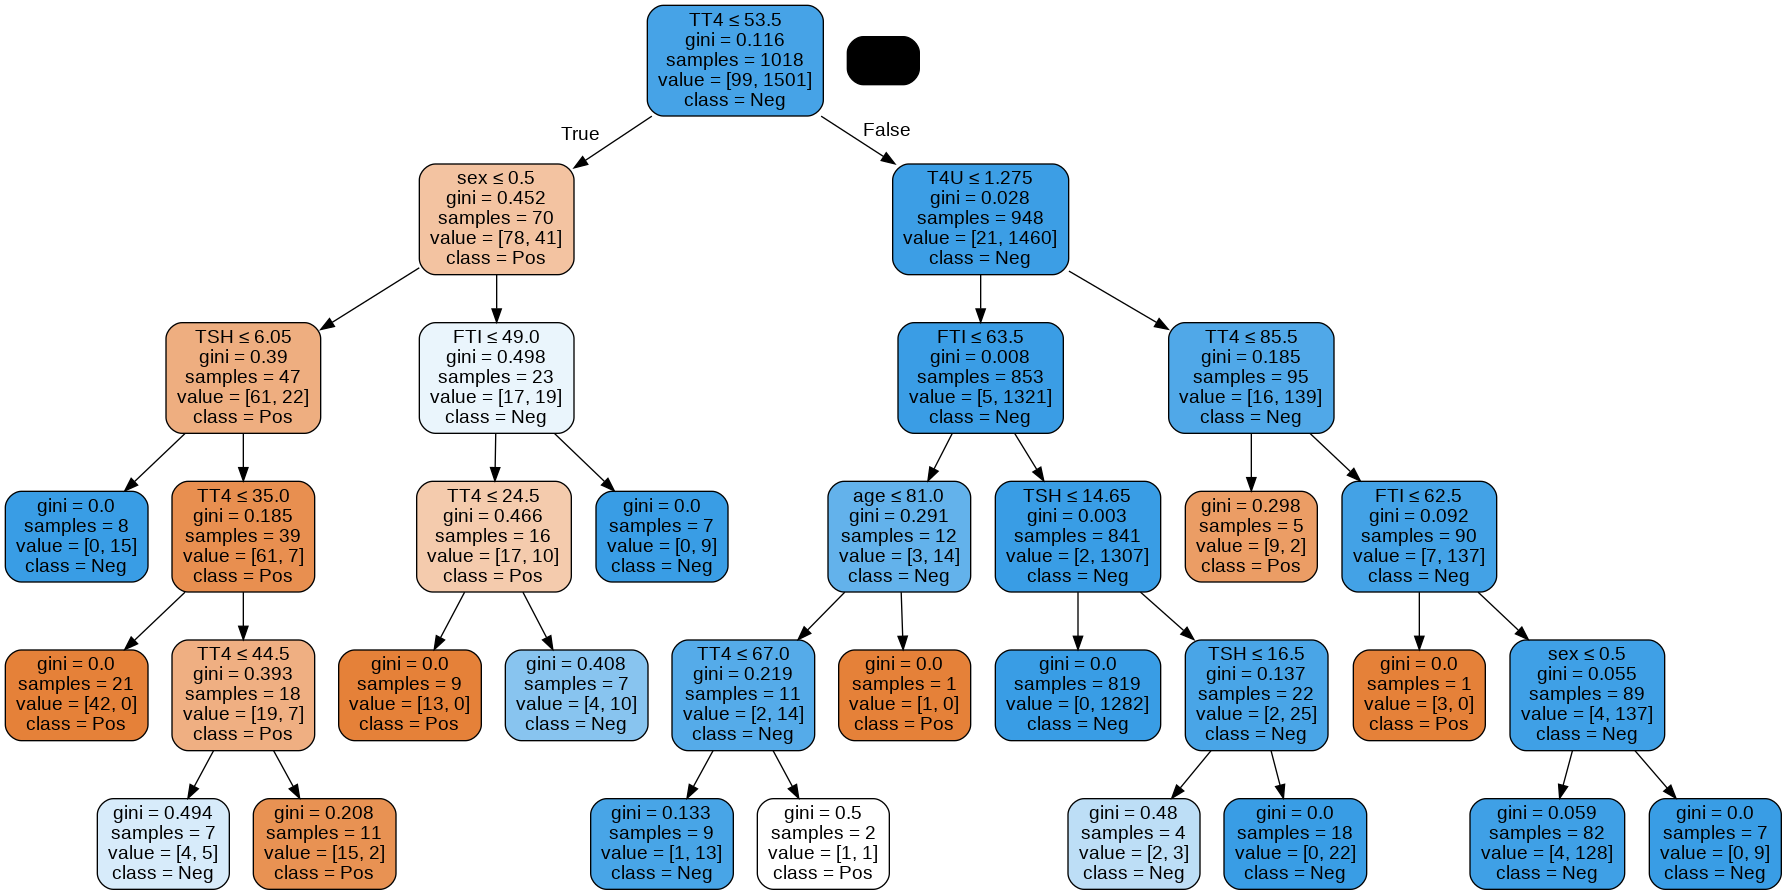

In [ ]:
## we will now visualize our random tree

#get specific tree from random forest
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names = ['Pos','Neg'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hyperthyroid_new.png')
Image(graph.create_png())

AdaBoost Classifier 

In [ ]:
#import AdaBoostClassifier to boost the decision trees for better prediction and less overfitting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# initialise AdaBoost model
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=0)
#train and test the adaboost model

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

In [62]:
accu = accuracy_score(y_test,y_pred_ada)
accu * 100



99.0

We can observe that after adding the adaboost classifier, our prediction goes up by 1% compared to our initial model.

Support Vector Machines

Downsampling the data for SVM models.

In [74]:
#reduce sample to include 50% positive and 50% negative
#0 = negative diagnosis
pos_df = hypothyroid[hypothyroid['status'] == 0]

In [75]:
pos_df.shape

(122, 24)

In [78]:
neg_df = hypothyroid[hypothyroid['status'] == 1]

In [77]:
from sklearn.utils import resample
pos_sample = resample(pos_df,replace = False,n_samples = 100,random_state = 42)

In [79]:
neg_sample = resample(neg_df,replace = False,n_samples = 100,random_state = 42)

In [81]:
#We now check the shape of the new sets before combining them.

print(pos_sample.shape)
print(neg_sample.shape)

(100, 24)
(100, 24)


In [80]:
#we then combine the data by concatenating

newdf = pd.concat([pos_sample,neg_sample])

In [82]:
#We have downsampled our data ready for use in building the SVM's
#check the shape of the new set to ensure success
newdf.shape



(200, 24)

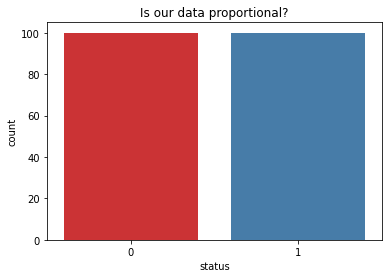

In [84]:
##We get to visualize the sample sizes
sns.countplot(x = 'status',palette='Set1',data =newdf)
plt.title('Is our data proportional?')
plt.show()
# our data is good to go!!

Linear Kernel Function

In [85]:
#use Support Vector Machines using a linear kernel function
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import train_test_split